<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/ConfusionMatrixFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Performance Metrics ---
Accuracy:  0.7000
Precision: 0.8000
Recall:    0.6667
F1 Score:  0.7273



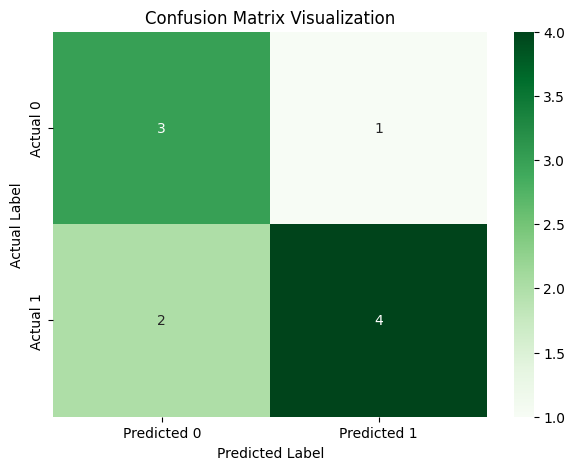

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class ConfusionMatrix:
    def __init__(self, actual, predicted):
        self.actual = np.array(actual)
        self.predicted = np.array(predicted)
        self.matrix = self._compute_matrix()
        self.tn, self.fp, self.fn, self.tp = self.matrix.ravel()

    def _compute_matrix(self):
        """Builds a 2x2 matrix from scratch."""
        matrix = np.zeros((2, 2), dtype=int)
        for a, p in zip(self.actual, self.predicted):
            matrix[a][p] += 1
        return matrix

    def accuracy(self):
        return (self.tp + self.tn) / len(self.actual)

    def precision(self):
        return self.tp / (self.tp + self.fp) if (self.tp + self.fp) > 0 else 0

    def recall(self):
        return self.tp / (self.tp + self.fn) if (self.tp + self.fn) > 0 else 0

    def f1_score(self):
        p, r = self.precision(), self.recall()
        return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

    def display_metrics(self):
        print(f"--- Performance Metrics ---")
        print(f"Accuracy:  {self.accuracy():.4f}")
        print(f"Precision: {self.precision():.4f}")
        print(f"Recall:    {self.recall():.4f}")
        print(f"F1 Score:  {self.f1_score():.4f}\n")

    def plot(self):
        """Generates a heatmap visualization."""
        plt.figure(figsize=(7, 5))
        sns.heatmap(self.matrix, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.title('Confusion Matrix Visualization')
        plt.show()

# --- Example Usage ---
if __name__ == "__main__":
    # Sample Data: 0 = Healthy, 1 = Disease
    y_true = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
    y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]

    # Initialize Class
    cm = ConfusionMatrix(y_true, y_pred)

    # Output Results
    cm.display_metrics()
    cm.plot()
